## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 

<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from wordcloud import WordCloud 
import plotly.express as px
from IPython.display import HTML, display, clear_output
import warnings

# Detección de sarcasmo
Para este ejercicio vas a utilizar el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos. Se pide:
1. Si hubiese missings, eliminalos


In [3]:
sarcasmo = pd.read_csv("C:\\Users\\inilo\\Downloads\\archive (1)\\train-balanced-sarcasm.csv")

In [4]:
sarcasmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [5]:
sarcasmo

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [6]:
sinnulos = sarcasmo.dropna()

2. Comprueba que está balanceado

In [7]:
print(sinnulos['label'].value_counts(normalize=True) * 100)

label
0    50.001731
1    49.998269
Name: proportion, dtype: float64


3. Divide el dataset en train test. Qué forma tienen?

In [9]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    sinnulos['comment'], 
    sinnulos['label'],
    test_size=0.2,
    random_state=42,
    stratify=sinnulos['label'])

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(808616,)
(808616,)
(202155,)
(202155,)


## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example


In [ ]:
top_subreddits = sinnulos['subreddit'].value_counts()[:10]
fig = px.pie(names=top_subreddits.index, values=top_subreddits.values, title='Distribución de los 10 mayores subreddits')
fig.update_layout(scene=dict(aspectmode="data"))
fig.show()

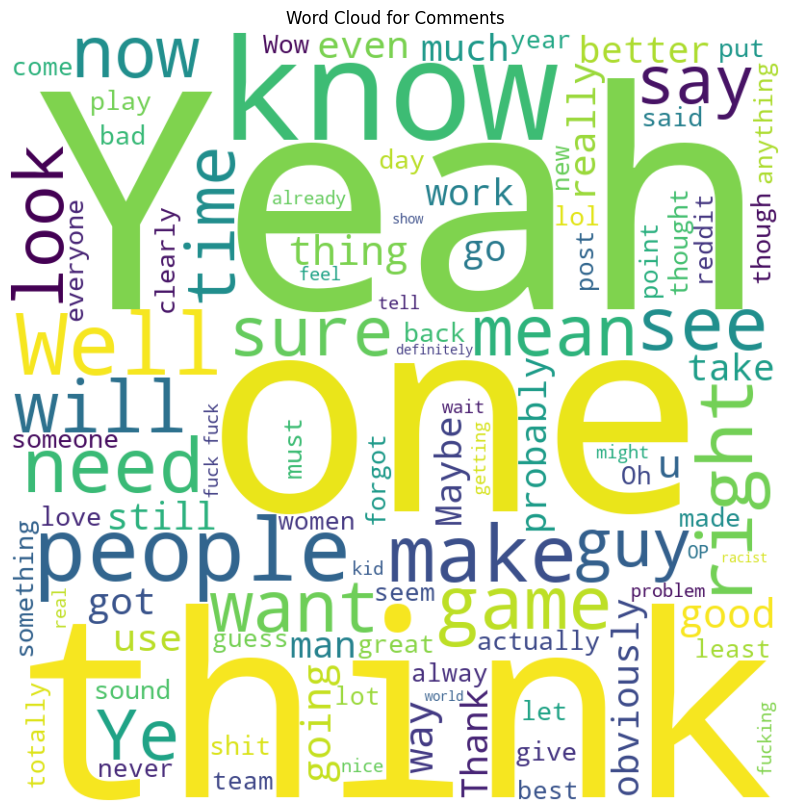

In [13]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=800,background_color='white',max_words=100).generate(' '.join(sinnulos['comment'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments')
plt.show()

In [18]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\inilo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


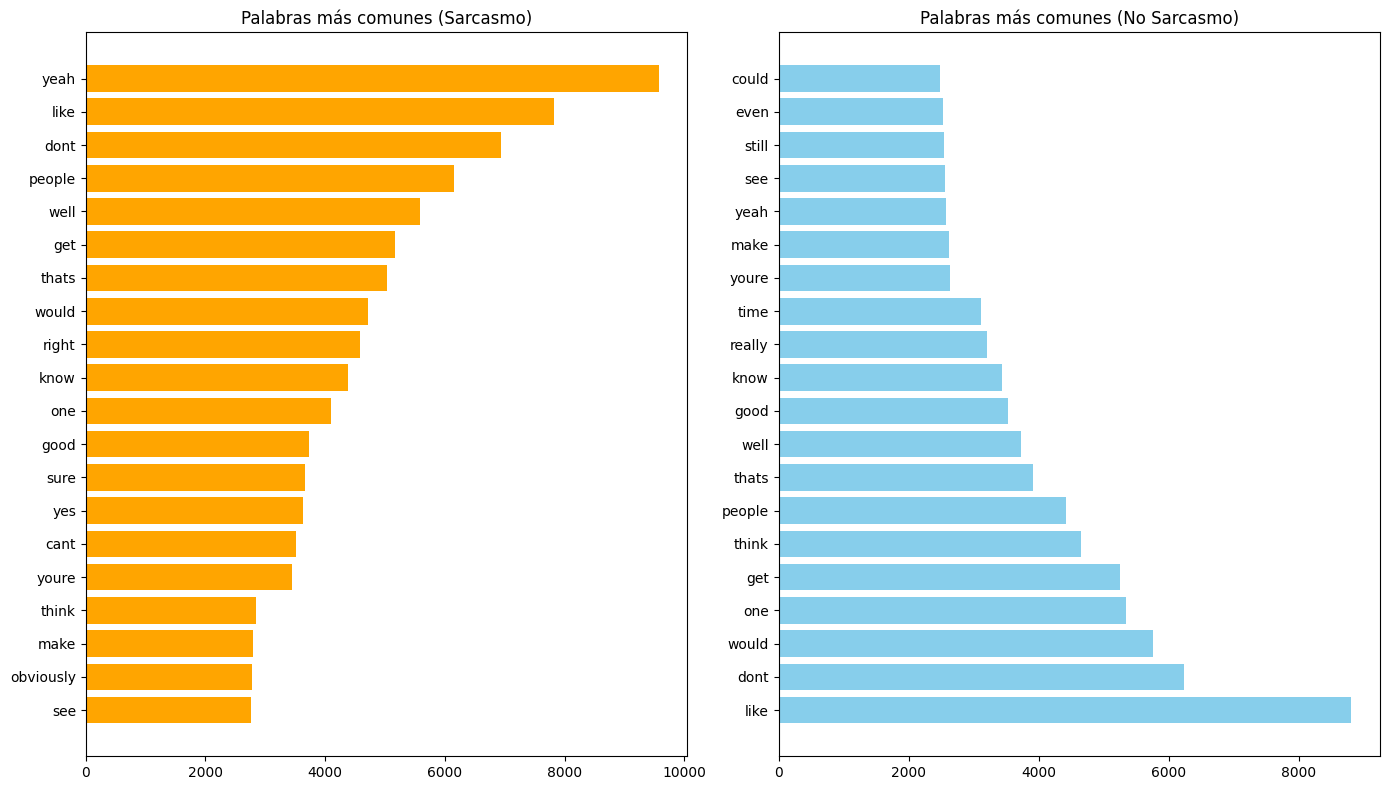

In [20]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_sample = sinnulos.sample(frac=0.3, random_state=42)

def tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()
    return [w for w in words if w not in stop_words and len(w) > 2]

sarcastic_words = []
non_sarcastic_words = []

for i, row in df_sample.iterrows():
    words = tokenize(row['comment'])
    if row['label'] == 1:
        sarcastic_words.extend(words)
    else:
        non_sarcastic_words.extend(words)

top_n = 20
sarcastic_common = Counter(sarcastic_words).most_common(top_n)
non_sarcastic_common = Counter(non_sarcastic_words).most_common(top_n)

df_sarc = pd.DataFrame(sarcastic_common, columns=['word', 'count'])
df_non_sarc = pd.DataFrame(non_sarcastic_common, columns=['word', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

axes[0].barh(df_sarc['word'], df_sarc['count'], color='orange')
axes[0].set_title('Palabras más comunes (Sarcasmo)')
axes[0].invert_yaxis()

axes[1].barh(df_non_sarc['word'], df_non_sarc['count'], color='skyblue')
axes[1].set_title('Palabras más comunes (No Sarcasmo)')

plt.tight_layout()
plt.show()

2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        stop_words='english',
        max_df=0.90,
        min_df=3,
        ngram_range=(1, 3)
    )),
    ('clf', LogisticRegression(C=1.0, penalty='l2', solver='liblinear',max_iter=10000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6875862580693033

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70    101081
           1       0.70      0.65      0.67    101074

    accuracy                           0.69    202155
   macro avg       0.69      0.69      0.69    202155
weighted avg       0.69      0.69      0.69    202155


Confusion Matrix:
 [[73502 27579]
 [35577 65497]]
